In [56]:
import backend.algorithms as algo
import backend.data_gen as data_gen
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [57]:
sites_dict = ['111','112','113','121','122','123','131','132','133','211','212','213','221','222','223','231','232','233','311','312','313','321','322','323','331','332','333']

In [58]:
number_of_sites = [2,5,10,20]
budgets = [10000,20000,40000,80000,160000]
simpel_regrets = {}
simpel_regrets_best = {}
site_lengths = {}

for site in number_of_sites:
    for budget in budgets:
        with open(f"SE/{site}_{budget}.obj", "rb") as input_file:
            simpel_regret,simpel_regret_best_only,remaining_sites_length= pickle.load(input_file)
            simpel_regrets[f"{site}_{budget}"] = simpel_regret
            simpel_regrets_best[f"{site}_{budget}"] = simpel_regret_best_only
            site_lengths[f"{site}_{budget}"] = remaining_sites_length

In [59]:
sites2 = ['2_10000', '2_20000', '2_40000', '2_80000', '2_160000']
sites5 = ['5_10000', '5_20000', '5_40000', '5_80000', '5_160000']
sites10 = ['10_10000', '10_20000', '10_40000', '10_80000', '10_160000']
sites20 = ['20_10000', '20_20000', '20_40000', '20_80000', '20_160000']
budgets_labels = ['10k','20k','40k','80k','160k']

<function matplotlib.pyplot.show(close=None, block=None)>

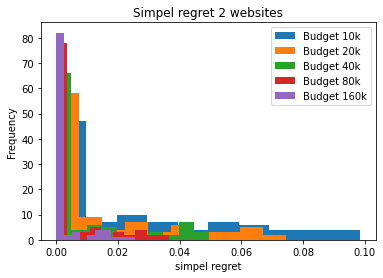

In [64]:
for idx, site in enumerate(sites2):
    plt.hist(simpel_regrets.get(site),label = f'Budget {budgets_labels[idx]}')
plt.legend()
plt.title('Simpel regret 2 websites')
plt.xlabel('simpel regret')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

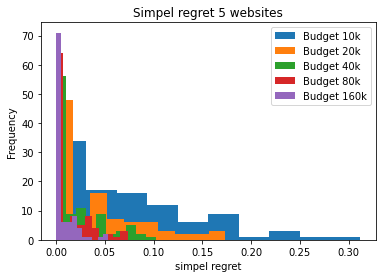

In [65]:
for idx, site in enumerate(sites5):
    plt.hist(simpel_regrets.get(site),label = f'Budget {budgets_labels[idx]}')
plt.legend()
plt.title('Simpel regret 5 websites')
plt.xlabel('simpel regret')
plt.ylabel('Frequency')
plt.show

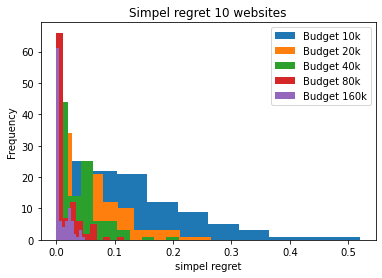

In [66]:
for idx, site in enumerate(sites10):
    plt.hist(simpel_regrets.get(site),label = f'Budget {budgets_labels[idx]}')
plt.legend()
plt.title('Simpel regret 10 websites')
plt.xlabel('simpel regret')
plt.ylabel('Frequency')
plt.show()

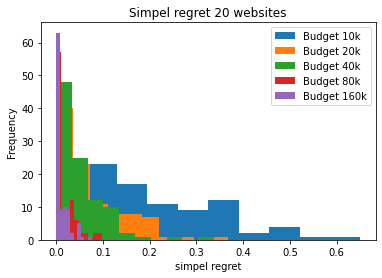

In [67]:
for idx, site in enumerate(sites20):
    plt.hist(simpel_regrets.get(site),label = f'Budget {budgets_labels[idx]}')
plt.legend()
plt.title('Simpel regret 20 websites')
plt.xlabel('simpel regret')
plt.ylabel('Frequency')
plt.show()